<a href="https://colab.research.google.com/github/rodrigosimoncalaca/projectDataScience/blob/master/TitanicCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisando Dados do Titanic através de Cluster**

In [0]:
#importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [0]:
import warnings
warnings.filterwarnings("ignore")

## Obtendo Dados

Dados retirados do site https://www.kaggle.com/c/titanic/data)

In [0]:
titanic_dataset = pd.read_csv("/content/titanic.csv")

## Primeiras Análises

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

In [5]:
# Executar para mostrar as 5 primeiras linhas, e entendermos a estrutura para montar um dicionário das variáveis
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



## Dicionário de Dados

   
* PassengerId: Número de identificação do passageiro
* Survived: Informa se o passageiro sobreviveu ao desastre
    - 0 = Não
    - 1 = Sim
* Pclass: Classe do bilhete
    - 1 = 1ª Classe
    - 2 = 2ª Classe
    - 3 = 3ª Classe
* Name: Nome do passageiro
* Sex: Sexo do passageiro
* Age: Idade do passageiro
* SibSp: Quantidade de cônjuges e irmãos a bordo
* Parch: Quantidade de pais e filhos a bordo
* Ticket: Número da passagem
* Fare: Preço da Passagem
* Cabin: Número da cabine do passageiro
* Embarked: Porto no qual o passageiro embarcou
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton



### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.


In [6]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(titanic_dataset.shape[0]))
print("Variáveis:\t {}\n".format(titanic_dataset.shape[1]))

# verificar os tipos das variáveis
display(titanic_dataset.dtypes)

Entradas:	 891
Variáveis:	 12



PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.


In [8]:
# ordenar em ordem decrescente as variáveis pela porcentagem de valores ausentes
(titanic_dataset.isnull().sum() / titanic_dataset.shape[0]).sort_values(ascending=False)*100

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma, que tem como objetivo mostrar a distribuição de frequências de dados obtidos por medições, para identificarmos a frequência com que algo acontece.

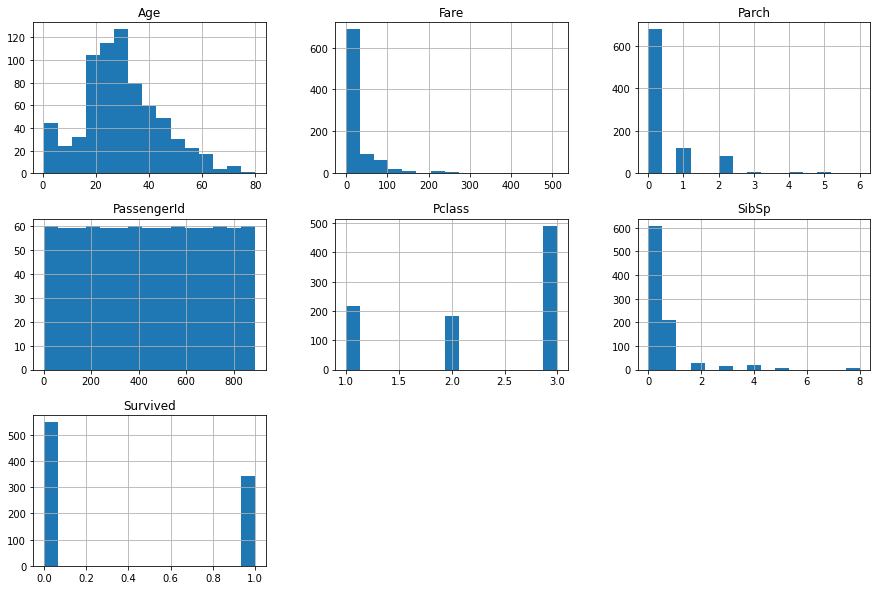

In [11]:
# plotar o histograma das variáveis numéricas
titanic_dataset.hist(bins=15, figsize=(15,10));

# **Pré-Processamento (Cluster)**

1. Crie um novo quadro de dados com colunas que determinarão os clusters
2. Codifique Sex colum para 0 e 1
3. Use o PCA para redução de dimensionalidade, para que possamos plotar pontos de dados facilmente

Como você pode ver, há uma coluna chamada Age (idade) que não está na mesma escala que o restante de nossos dados, mas como estamos usando o PCA, tudo estará na mesma escala.

## Criando novo quadro de dados

In [15]:
# Vamos excluir as colunas que não iremos usar
set_to_use = titanic_dataset
set_to_use = set_to_use.drop('Name', axis=1)
set_to_use = set_to_use.drop('Ticket', axis=1)
set_to_use = set_to_use.drop('Fare', axis=1)
set_to_use = set_to_use.drop('Embarked', axis=1)
set_to_use.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,male,22.0,1,0,NaN
1,2,1,1,female,38.0,1,0,C85
2,3,1,3,female,26.0,0,0,NaN
3,4,1,1,female,35.0,1,0,C123
4,5,0,3,male,35.0,0,0,NaN


In [0]:
# fillna() - é usado para atualizar valores ausentes com a média, moda ou mediana da coluna. 
set_to_use.fillna(0, inplace=True)

In [18]:
#Podemos observar que não existe mais valores ausentes
set_to_use.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,male,22.0,1,0,0
1,2,1,1,female,38.0,1,0,C85
2,3,1,3,female,26.0,0,0,0
3,4,1,1,female,35.0,1,0,C123
4,5,0,3,male,35.0,0,0,0


## Codificando a coluna Sexo usando LabelEncoder


In [0]:
#Biblioteca usada basicamente para converter os valores categórios em valores numéricos.
from sklearn.preprocessing import LabelEncoder

In [0]:
# O indexador iloc, seleciona por números inteiros das linhas, arrays ou por slice
# Parâmetro :,3 significa que quero transformar todas as linhas da coluna com indice 3, lembrando que a contagem começa no 0
encoder = LabelEncoder()
encoded_sex = encoder.fit_transform(set_to_use.iloc[:, 3])

In [0]:
#substituo a coluna Sex pelos novos valores que agora serão numéricos
set_to_use['Sex'] = encoded_sex

In [23]:
set_to_use.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,1,22.0,1,0,0
1,2,1,1,0,38.0,1,0,C85
2,3,1,3,0,26.0,0,0,0
3,4,1,1,0,35.0,1,0,C123
4,5,0,3,1,35.0,0,0,0


In [0]:
# Estou gerando uma nova váriavel com todas as linhas a partir do indice 1 até a última coluna
features = set_to_use.iloc[:, 1:-1].values

In [29]:
print(features)

[[ 0.  3.  1. 22.  1.  0.]
 [ 1.  1.  0. 38.  1.  0.]
 [ 1.  3.  0. 26.  0.  0.]
 ...
 [ 0.  3.  0.  0.  1.  2.]
 [ 1.  1.  1. 26.  0.  0.]
 [ 0.  3.  1. 32.  0.  0.]]


## Usando a Análise de Componentes Principais (PCA) para redução de dimensionalidade

In [0]:
from sklearn.decomposition import PCA

In [0]:
#Reduzindo para 4 componentes
titanic_pca = PCA(n_components=4)
titanic_pca.fit(features)
test = titanic_pca.transform(features)

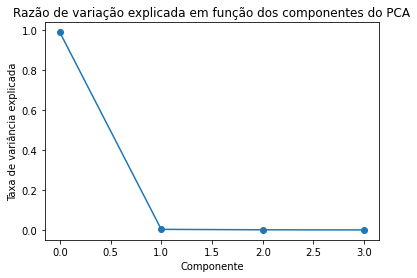

In [37]:
plt.plot(list(titanic_pca.explained_variance_ratio_),'-o')
plt.title('Razão de variação explicada em função dos componentes do PCA')
plt.ylabel('Taxa de variância explicada')
plt.xlabel('Componente')
plt.show()

**Este PCA acima com 4 componentes foi para teste. Vamos precisar de 2 componentes para plotagem 2D, também para cada algoritmo de agrupamento que usaremos características reduzidas com 2 recursos**

In [0]:
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(features)

## Clustering

Primeiro vamos usar a versão SKlearn do KMeans

In [0]:
from sklearn.cluster import KMeans

- Iremos começar com a versão de 5 clusters.


In [0]:
km = KMeans(n_clusters=5)
clusters = km.fit(reduced_features)


In [41]:
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

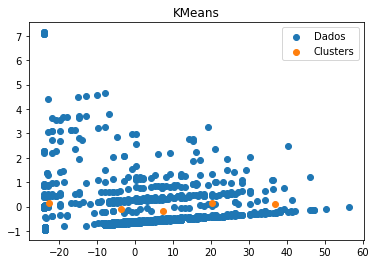

In [53]:


plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Dados')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("KMeans")
plt.legend()
plt.show()

In [44]:
reduced_features.shape

(891, 2)

In [46]:
clusters.cluster_centers_

array([[-22.6707669 ,   0.13760433],
       [  7.26957844,  -0.16324169],
       [ 20.40166879,   0.15568667],
       [ -3.55585101,  -0.10161391],
       [ 36.77858312,   0.12392474]])

## Método do cotovelo

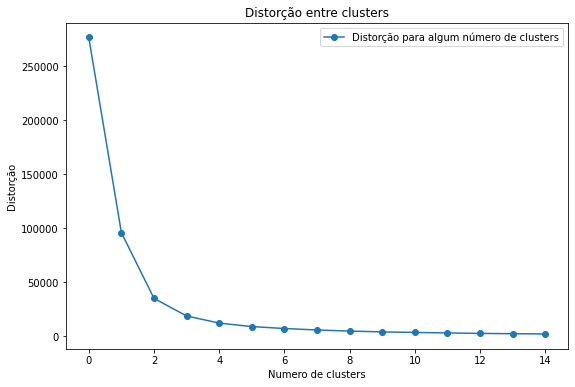

In [51]:
cluster_distorsion = []
for i in range(1, 16):
    test_sklearn = KMeans(n_clusters=i)
    test_sklearn.fit(reduced_features)
    cluster_distorsion.append(test_sklearn.inertia_)
plt.figure(figsize=(9, 6))
plt.plot(cluster_distorsion, marker='o', label='Distorção para algum número de clusters')
plt.title("Distorção entre clusters")
plt.xlabel('Numero de clusters')
plt.ylabel("Distorção")
plt.legend()
plt.show()

## Mudança Média

In [0]:
from sklearn.cluster import MeanShift

In [0]:
mean_shift_sklearn = MeanShift(bandwidth=6.5)

In [0]:
clust = mean_shift_sklearn.fit(reduced_features)

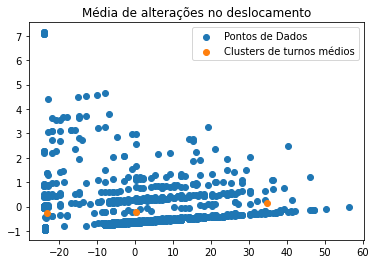

In [58]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Pontos de Dados')
plt.scatter(clust.cluster_centers_[:, 0], clust.cluster_centers_[:, 1], label='Clusters de turnos médios')
plt.title("Média de alterações no deslocamento")
plt.legend()
plt.show()